# Principal Component Analyis of Dax Index 

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

** Data fetched from Yahoo finance for Dax Index and its 30 stocks **

In [2]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [3]:
%%time
data = pd.DataFrame()
for sym in symbols:
    # only retrieves data from Jan 2016 on
    data[sym] = pdr.get_data_yahoo(sym)['Adj Close']
data = data.dropna()

Wall time: 1min 11s


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2019-06-03 to 2019-07-24
Data columns (total 31 columns):
ADS.DE     37 non-null float64
ALV.DE     37 non-null float64
BAS.DE     37 non-null float64
BAYN.DE    37 non-null float64
BEI.DE     37 non-null float64
BMW.DE     37 non-null float64
CBK.DE     37 non-null float64
CON.DE     37 non-null float64
DAI.DE     37 non-null float64
DB1.DE     37 non-null float64
DBK.DE     37 non-null float64
DPW.DE     37 non-null float64
DTE.DE     37 non-null float64
EOAN.DE    37 non-null float64
FME.DE     37 non-null float64
FRE.DE     37 non-null float64
HEI.DE     37 non-null float64
HEN3.DE    37 non-null float64
IFX.DE     37 non-null float64
LHA.DE     37 non-null float64
LIN.DE     37 non-null float64
LXS.DE     37 non-null float64
MRK.DE     37 non-null float64
MUV2.DE    37 non-null float64
RWE.DE     37 non-null float64
SAP.DE     37 non-null float64
SDF.DE     37 non-null float64
SIE.DE     37 non-null float64
TKA.DE   

In [5]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [7]:
scale_func = lambda x:(x-x.mean())/x.std()

In [67]:
weighted_ratio = lambda x:x/x.sum()

** 2 data will plotted and will be compared with Dax Index **

** 30 stocks data will be transformed in one and 5 principal components **

In [ ]:
dax_pca_1 = PCA(n_components=1).fit(data.apply(scale_func))

In [ ]:
pca_1_data = dax_pca_1.transform(-data)

In [ ]:
dax['PCA_1'] = pca_1_data

In [68]:
dax_pca_5 = PCA(n_components=5).fit(data.apply(scale_func))

In [69]:
pca_5_data = dax_pca_5.transform(-data)

** Eigen values are given by pca.explained variance **

** Eigen vectors are given by pca.components **

** Weighted eigen values will be mutiplied by transformed pca components to get index replica **

In [73]:
dax['PCA_5'] = np.dot(weighted_ratio(dax_pca_5.explained_variance_),pca_5_data.T)

** As given below, PCA decomposition have helped to fetch the principal components from 30 index to replicate Dax Index **

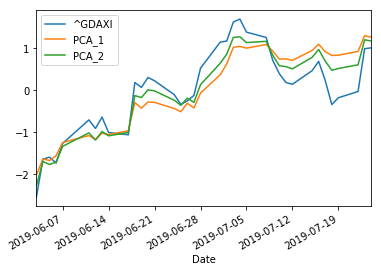

In [74]:
dax.apply(scale_func).plot()

** Eigen values are fetched to find how many stocks/features can have max variance in the eigen vector direction **

** Will study all the 30 stocks as components and find there eigen values and eigen vectors **

** Eigen vectors for each stock will show its weighted in Index movement or direction **

** Eigen values represent the variance in direction of eigen vectors **

In [8]:
cov_matrix = PCA(n_components=30).fit(data.apply(scale_func))

In [10]:
cov_matrix.explained_variance_.round(3)

array([1.371e+01, 7.479e+00, 2.655e+00, 2.298e+00, 1.204e+00, 6.570e-01,
       4.020e-01, 4.010e-01, 2.720e-01, 2.240e-01, 1.610e-01, 1.360e-01,
       1.190e-01, 5.500e-02, 5.000e-02, 3.700e-02, 2.600e-02, 2.400e-02,
       1.700e-02, 1.500e-02, 1.500e-02, 1.200e-02, 9.000e-03, 7.000e-03,
       4.000e-03, 4.000e-03, 2.000e-03, 2.000e-03, 1.000e-03, 0.000e+00])

In [19]:
var = np.cumsum(cov_matrix.explained_variance_ratio_.round(3))

In [20]:
var

array([0.457, 0.706, 0.795, 0.872, 0.912, 0.934, 0.947, 0.96 , 0.969,
       0.976, 0.981, 0.986, 0.99 , 0.992, 0.994, 0.995, 0.996, 0.997,
       0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 0.999])

** As given below in plot, only 6 stocks can explain 95% of variance **

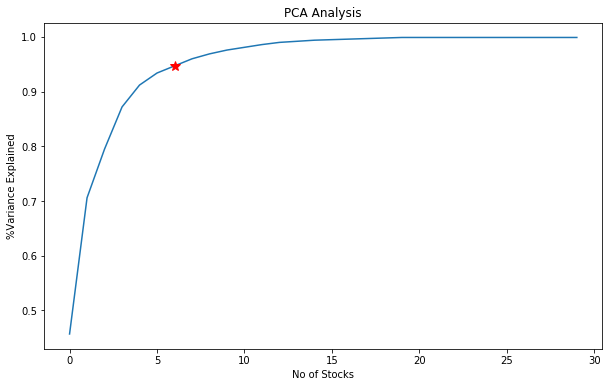

In [95]:
plt.figure(figsize=(10,6))
plt.plot(var)
plt.title('PCA Analysis')
plt.xlabel('No of Stocks')
plt.ylabel('%Variance Explained')
plt.plot(6,.947,'r*',markersize=10.)

In [75]:
pca = PCA(n_components=1).fit(data.apply(scale_func))

In [81]:
print(-pca.components_.round(2))

[[ 0.26  0.25  0.06  0.24  0.16  0.26  0.14 -0.09 -0.06  0.21  0.25  0.27
  -0.13 -0.12  0.16 -0.01 -0.    0.23  0.23 -0.19  0.19  0.26  0.22  0.18
   0.12  0.14 -0.   -0.15 -0.05  0.26]]


** Heat map created to show each stock weightage for Index based on eigen vector **

** As Eigen vector gives the direction, stocks mapped as yellow ( Have vector value more than .2 ) have strong importance in Index movement **


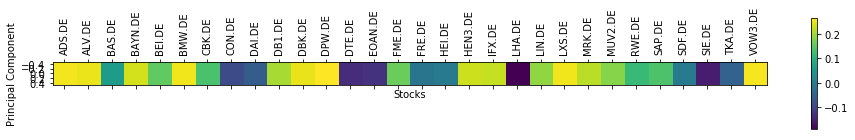

In [84]:
plt.figure(figsize=(12,10))
plt.matshow(-pca.components_,cmap='viridis')
plt.colorbar()
plt.xticks(range(len(data.columns)),data.columns,rotation=90)
plt.xlabel('Stocks')
plt.ylabel('Principal Component')